In [59]:
import pandas as pd
import seaborn as sns
from PIL import Image
from pathlib import Path
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


In [41]:
data = {'Monster': [], 'Label': [], 'PixelColors': []}

for img_path in Path('./dataset').rglob('*.png'):
    with Image.open(img_path) as img:

        if img_path.parents[0].name == 'Fire':
            element = 'Fire'
        elif 'Water' in img_path.parents[0].name:
            element = 'Water'
        elif 'Wind' in img_path.parents[0].name:
            element = 'Wind'
        elif 'Dark' in img_path.parents[0].name:
            element = 'Dark'
        elif 'Light' in img_path.parents[0].name:
            element = 'Light'

        img = img.convert("RGB")
        pixel_colors = np.array(img).reshape(-1).tolist()
            
        data['Monster'].append(img_path.stem)
        data['Label'].append(element)
        data['PixelColors'].append(pixel_colors)

In [57]:
df = pd.DataFrame(data)

In [58]:
X = df['PixelColors'].tolist()
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC(C=0.1, kernel='rbf')
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

cv_scores = cross_val_score(svm_classifier, X, y, cv=5) 
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Accuracy: 0.85
              precision    recall  f1-score   support

        Dark       0.84      0.88      0.86        48
        Fire       1.00      0.86      0.92        49
       Light       0.75      0.86      0.80        35
       Water       0.92      0.74      0.82        47
        Wind       0.76      0.91      0.83        45

    accuracy                           0.85       224
   macro avg       0.85      0.85      0.85       224
weighted avg       0.86      0.85      0.85       224

Cross-Validation Scores: [0.80357143 0.83928571 0.90134529 0.86995516 0.82959641]
Mean CV Accuracy: 0.848750800768738


In [60]:
X = df['PixelColors'].tolist()
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

cv_scores = cross_val_score(rf_classifier, X, y, cv=5) 
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Accuracy: 0.95
              precision    recall  f1-score   support

        Dark       1.00      0.90      0.95        48
        Fire       1.00      0.92      0.96        49
       Light       0.97      0.97      0.97        35
       Water       0.94      0.98      0.96        47
        Wind       0.87      1.00      0.93        45

    accuracy                           0.95       224
   macro avg       0.96      0.95      0.95       224
weighted avg       0.96      0.95      0.95       224

Cross-Validation Scores: [0.95982143 0.94196429 0.93721973 0.95515695 0.93273543]
Mean CV Accuracy: 0.9453795643818065


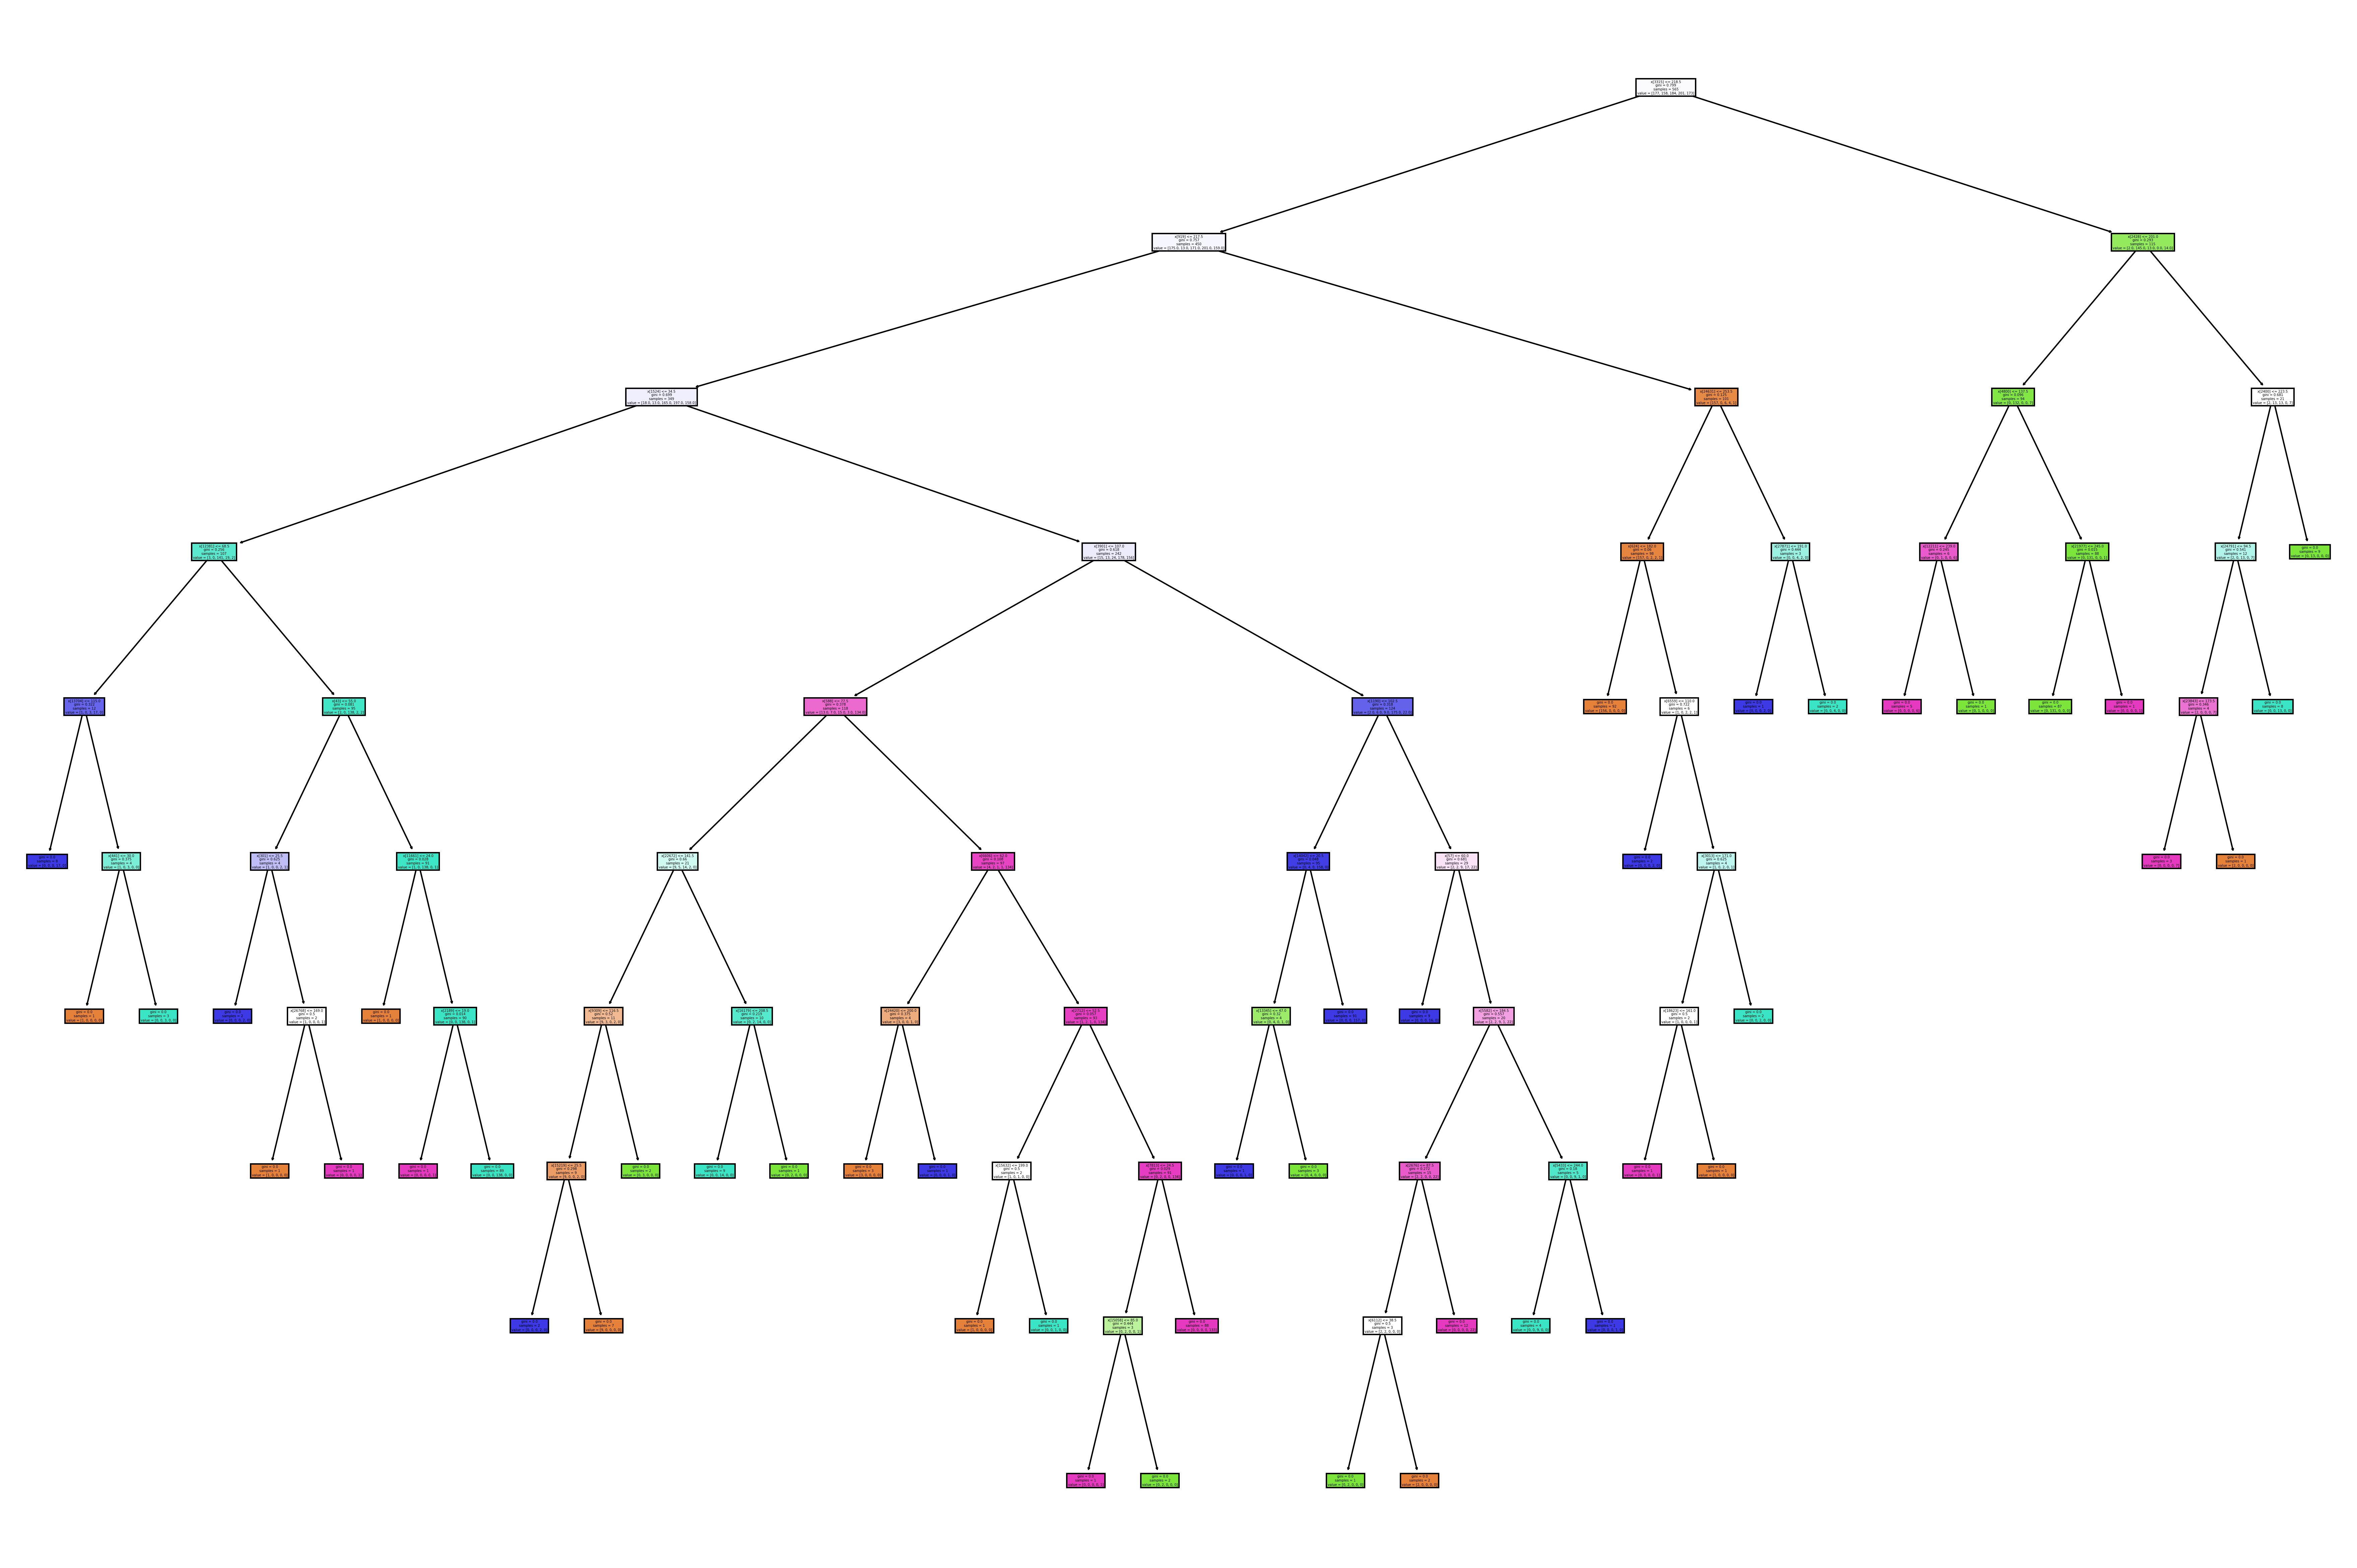

In [61]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

first_tree = rf_classifier.estimators_[0]

plt.figure(figsize=(30, 20), dpi=300)
plot_tree(first_tree, filled=True)
plt.show()
